**Coursebook: Python Fundamentals and Exploratory Data Analysis**
- Part 2 of Python Beginner DBS Indonesia Training
- Course Length: 6 hours
- Last Updated:  January 2023

___

- Author: [Samuel Chan](https://github.com/onlyphantom)
- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

## Top-Down Approach 

The coursebook is part of the **Data Analytics Specialization** offered by [Algoritma](https://algorit.ma). It takes a more accessible approach compared to Algoritma's core educational products, by getting participants to overcome the "how" barrier first, rather than a detailed breakdown of the "why". 

This translates to an overall easier learning curve, one where the reader is prompted to write short snippets of code in frequent intervals, before being offered an explanation on the underlying theoretical frameworks. Instead of mastering the syntactic design of the Python programming language, then moving into data structures, and then the `pandas` library, and then the mathematical details in an imputation algorithm, and its code implementation; we would do the opposite: Implement the imputation, then a succinct explanation of why it works and applicational considerations (what to look out for, what are assumptions it made, when _not_ to use it etc).

## Training Objectives

This coursebook is intended for participants who have completed the preceding courses offered in the **Data Analytics** Specialization. 

The coursebook focuses on:
- Why and What: Exploratory Data Analysis
- Date Time objects
- Categorical data types
- Cross Tabulation and Pivot Table
- Treating Duplicates and Missing Values
- Pandas basic visualization

At the end of this course is a Learn-by-Building section, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

# Data Preparation and Exploration

About 60 years ago, John Tukey defined data analysis as the "procedures for analyzing data, techniques for interpreting the results of such procedures ... and all the machinery of mathematical statistics which apply to analyzing data". His championing of EDA encouraged the development of statsitical computing packages, especially S at Bell Labs (which later inspired R).

He wrote a book titled _Exploratory Data Analysis_ arguing that too much emphasis in statistics was placed on hypothesis testing (confirmatory data analysis) while not enough was placed on the discovery of the unexpected. 

> Exploratory data analysis isolates patterns and features of the data and reveals these forcefully to the analyst.

This course aims to present a selection of EDA techniques -- some developed by John Tukey himself -- but with a special emphasis on its application to modern business analytics.

In the previous course, we've got our hands on a few common techniques:

- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`

In the following chapters, we'll expand our EDA toolset with the following additions:  

- Tables
- Cross-Tables and Aggregates
- Using `aggfunc` for aggregate functions

In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)

# pandas output display setup
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None

1.4.4


## Working with Datetime

Given the program's special emphasis on business-driven analytics, one data type of particular interest to us is the `datetime`. In the first part of this coursebook, we've seen an example of `datetime` in the section introducing data types (`employees.joined`).

A large portion of data science work performed by business executives involve time series and/or dates (think about the kind of data science work done by computer vision researchers, and compare that to the work done by credit rating analysts or marketing executives and this special relationship between business and datetime data becomes apparent), so adding a level of familiarity with this format will serve you well in the long run. 

As a start, let's read our data,`loan.csv`:

In [2]:
loan = pd.read_csv('data_input/loan.csv')
loan.dtypes

Unnamed: 0                int64
id                        int64
year                      int64
issue_d                  object
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

Notice that all columns are in the right data types, except for `issue_d`. The correct data type for this column would have to be a `datetime`. In previous module, you've learned how you can use `.astype()` to adjust a data type for a column. In fact, pandas has a function to work with datetime object in particular.

To convert a column `x` to a datetime, we would use:

    `x = pd.to_datetime(x)`
    

In [3]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'])
loan.dtypes

Unnamed: 0                       int64
id                               int64
year                             int64
issue_d                 datetime64[ns]
emp_length_int                 float64
home_ownership                  object
home_ownership_cat               int64
income_category                 object
annual_inc                       int64
income_cat                       int64
loan_amount                      int64
term                            object
term_cat                         int64
application_type                object
purpose                         object
purpose_cat                      int64
interest_payments               object
interest_payment_cat             int64
loan_condition                  object
loan_condition_cat               int64
interest_rate                  float64
grade                           object
grade_cat                        int64
dti                            float64
total_pymnt                    float64
total_rec_prncp          

Unlike using `astype()`, with `pd.to_datetime()` you are allowed to specify more arguments for the datetime conversion. Why it matters? Suppose we have a column which stores a daily sales data from end of January to the beginning of February:

In [4]:
date = pd.Series(['30-01-2020', '31-01-2020', '01-02-2020','02-02-2020'])
date

0    30-01-2020
1    31-01-2020
2    01-02-2020
3    02-02-2020
dtype: object

The legal and cultural expectations for datetime format may vary between countries. In Indonesia for example, most people are used to storing dates in DMY order. Let's see what happen next when we convert our `date` to datetime object:

In [5]:
date.astype('datetime64')

/Users/amalia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '30-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
/Users/amalia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '31-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,


0   2020-01-30
1   2020-01-31
2   2020-01-02
3   2020-02-02
dtype: datetime64[ns]

Take a look on the third observation; rather than representing February 1st as it suppose, the data converted to January 2nd. Thing to note here, for dates with multiple representations, `pandas` will infer it as a month first order by default.

Using `pd.to_datetime`, you can specify your date formatting with parameters such as `format`* or `dayfirst`:

In [6]:
# pd.to_datetime(date, format='%d-%m-%Y')
pd.to_datetime(date, dayfirst=True)

0   2020-01-30
1   2020-01-31
2   2020-02-01
3   2020-02-02
dtype: datetime64[ns]

\*_Using Python's `datetime` module, `pandas` pass the date string to `.strptime()` and follows by what's called Python's strptime directives. The full list of directives can be found in this [Documentation](https://strftime.org/)._

Other than `to_datetime`, `pandas` has a number of machineries to work with `datetime` objects. These are convenient for when we need to extract the `month`, or `year`, or `weekday_name` from `datetime`. Some common applications in business analysis include:

- `loan['issue_d'].dt.month`
- `loan['issue_d'].dt.month_name()`
- `loan['issue_d'].dt.year`
- `loan['issue_d'].dt.day`
- `loan['issue_d'].dt.dayofweek`
- `loan['issue_d'].dt.hour`
- `loan['issue_d'].dt.day_name()`

In [7]:
# code here


There are also other functions that can be helpful in certain situations. Supposed we want to transform the existing `datetime` column into values of periods we can use the `.to_period` method:

- `loan['issue_d'].dt.to_period('D')`
- `loan['issue_d'].dt.to_period('W')`
- `loan['issue_d'].dt.to_period('M')`
- `loan['issue_d'].dt.to_period('Q')`

In [8]:
# code here


## Working with Categories

From the output of `dtypes`, we see that there are three variables currently stored as `object` type where a `category` is more appropriate. This is a common diagnostic step, and one that you will employ in almost every data analysis project.

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722423 entries, 0 to 722422
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            722423 non-null  int64         
 1   id                    722423 non-null  int64         
 2   year                  722423 non-null  int64         
 3   issue_d               722423 non-null  datetime64[ns]
 4   emp_length_int        722423 non-null  float64       
 5   home_ownership        722423 non-null  object        
 6   home_ownership_cat    722423 non-null  int64         
 7   income_category       722423 non-null  object        
 8   annual_inc            722423 non-null  int64         
 9   income_cat            722423 non-null  int64         
 10  loan_amount           722423 non-null  int64         
 11  term                  722423 non-null  object        
 12  term_cat              722423 non-null  int64         
 13 

Which columns are more "fit" as category?

- 
- 
- 
-

In [10]:
# change the columns type into category using .astype()

cat_cols = ['region', 'home_ownership', 'income_category', 'grade']

loan[cat_cols] = loan[cat_cols].astype('category')

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722423 entries, 0 to 722422
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            722423 non-null  int64         
 1   id                    722423 non-null  int64         
 2   year                  722423 non-null  int64         
 3   issue_d               722423 non-null  datetime64[ns]
 4   emp_length_int        722423 non-null  float64       
 5   home_ownership        722423 non-null  category      
 6   home_ownership_cat    722423 non-null  int64         
 7   income_category       722423 non-null  category      
 8   annual_inc            722423 non-null  int64         
 9   income_cat            722423 non-null  int64         
 10  loan_amount           722423 non-null  int64         
 11  term                  722423 non-null  object        
 12  term_cat              722423 non-null  int64         
 13 

So what is the benefits from using categorical data type? 
\
\
*note : Please check the memory consumption before and after the conversion*

# Contingency Tables

One of the simplest EDA toolkit is the frequency table (contingency tables) and cross-tabulation tables. It is highly familiar, convenient, and practical for a wide array of statistical tasks. The simplest form of a table is to display counts of a `categorical` column.

In `pandas`, each column of a `DataFrame` is a `Series`. To get the counts of each unique levels in a categorical column, we can use `.value_counts()`. The resulting object is a `Series` and in descending order so that the most frequent element is on top. 

Try and perform `.value_counts()` on the `format` column, adding either:

- `sort=False` as a parameter to prevent any sorting of elements, or
- `ascending=True` as a parameter to sort in ascending order instead

In [12]:
loan['income_category'].value_counts(sort=False, ascending=True)

High       13316
Low       595118
Medium    113989
Name: income_category, dtype: int64

In [13]:
## Your code below


## -- Solution code

`crosstab` is a very versatile solution to producing frequency tables on a `DataFrame` object. Its utility really goes further than that but we'll start with a simple use-case.

Consider the following code: we use `pd.crosstab()` passing in the values to group by in the rows (`index`) and columns (`columns`) respectively. 

In [14]:
pd.crosstab(index=loan['income_category'], columns="count")

col_0             count
income_category        
High              13316
Low              595118
Medium           113989

In [15]:
# code here


How to sort crosstab values?

In [16]:
pd.crosstab(index=loan['income_category'], columns="count").sort_values(by='count')

col_0             count
income_category        
High              13316
Medium           113989
Low              595118

Realize that in the code above, we're setting the row (index) to be `sub_category` and the function will by default compute a frequency table. 

In [17]:
pd.crosstab(index=loan['income_category'], columns="count", normalize='all')

col_0            count
income_category       
High              0.02
Low               0.82
Medium            0.16

In the cell above, we set the values to be normalized over each columns, and this will divide each values in place over the sum of all values. This is equivalent to a manual calculation:

In [18]:
catego = pd.crosstab(index=loan['income_category'], columns="count")
#catego / catego.sum()

We can also use the same `crosstab` method to compute a cross-tabulation of two factors. In the following cell, the `index` references the sub-category column while the `columns` references the format column:

In [19]:
pd.crosstab(index=loan['income_category'], columns=loan['region'])

region           Northern-Irl  cannught  leinster  munster  ulster
income_category                                                   
High                     3983      1735      2849     1615    3134
Low                    134742    108166    145628    68688  137894
Medium                  28988     15850     25225    14704   29222

This is intuitive in a way: We use `crosstab()` which, we recall, computes the count and we pass in `index` and `columns` which correspond to the row and column respectively.

When we add `margins=True` to our method call, then an extra row and column of margins (subtotals) will be included in the output:

In [20]:
pd.crosstab(index=loan['income_category'], 
            columns=loan['region'], 
            normalize='columns',
            margins=True)*100

region           Northern-Irl  cannught  leinster  munster  ulster   All
income_category                                                         
High                     2.37      1.38      1.64     1.90    1.84  1.84
Low                     80.34     86.02     83.84    80.80   81.00 82.38
Medium                  17.28     12.60     14.52    17.30   17.16 15.78

`normalize` accepts a boolean value, or one of `all`, `index` or `columns`. Since we want it to normalize across each row, we will set this parameter to the value of `index`.

### Case
Try to find a proportion of Good and Bad loan for all region in this loan data! Don't forget to check the few lines of data first.

In [21]:
## Your code below


## -- Solution code

## Exploratory Data Analysis

## Aggregation Table

In the following section, we will introduce another parameter to perform aggregation on our table. The `aggfunc` parameter when present, required the `values` parameter to be specified as well. `values` is the values to aggregate according to the factors in our index and columns:

In [22]:
pd.crosstab(index=loan['region'], 
            columns='mean', 
            values=loan['annual_inc'],
            aggfunc='mean')

col_0             mean
region                
Northern-Irl 78,691.50
cannught     69,816.99
leinster     72,320.06
munster      77,266.41
ulster       76,186.56

In [23]:
loan.head()

Unnamed: 0       id  year    issue_d  emp_length_int home_ownership  \
0           0  1077501  2011 2011-01-12           10.00           RENT   
1           1  1077430  2011 2011-01-12            0.50           RENT   
2           2  1077175  2011 2011-01-12           10.00           RENT   
3           3  1076863  2011 2011-01-12           10.00           RENT   
4           4  1075358  2011 2011-01-12            1.00           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  loan_amount  \
0                   1             Low       24000           1         5000   
1                   1             Low       30000           1         2500   
2                   1             Low       12252           1         2400   
3                   1             Low       49200           1        10000   
4                   1             Low       80000           1         3000   

         term  term_cat application_type         purpose  purpose_cat  \
0   36 months         1       INDIVIDUAL     credit_card            1   
1   60 months         2       INDIVIDUAL             car            2   
2   36 months         1       INDIVIDUAL  small_business            3   
3   36 months         1       INDIVIDUAL           other            4   
4   60 months         2       INDIVIDUAL           other            4   

  interest_payments  interest_payment_cat loan_condition  loan_condition_cat  \
0               Low                     1      Good Loan                   0   
1              High                     2       Bad Loan                   1   
2              High                     2      Good Loan                   0   
3              High                     2      Good Loan                   0   
4               Low                     1      Good Loan                   0   

   interest_rate grade  grade_cat   dti  total_pymnt  total_rec_prncp  \
0          10.65     B          2 27.65     5,861.07         5,000.00   
1          15.27     C          3  1.00     1,008.71           456.46   
2          15.96     C          3  8.72     3,003.65         2,400.00   
3          13.49     C          3 20.00    12,226.30        10,000.00   
4          12.69     B          2 17.94     3,242.17         2,233.10   

   recoveries  installment    region  
0        0.00       162.87   munster  
1      117.08        59.83  leinster  
2        0.00        84.33  cannught  
3        0.00       339.31    ulster  
4        0.00        67.79    ulster

**Knowledge Check**: Cross tabulation  

Create a cross-tab using `loan_condition` as the index (row). Fill the values with the mean of `interest_rate`. 

Create a new cell for your code

In [24]:
## Your code below

## -- Solution code

What can you conclude from that aggregated values?

- 

### mean vs median

Mean and Median are the best practice aggreagation function. But when do we have to use each one of them? 

In [25]:
income = pd.Series([7,5,6,4.5,8,10,80])

In [26]:
income.mean()

17.214285714285715

In [27]:
income.median()

7.0

mean is sensitive towards outlier

## Data Visualization

Pandas has built-in `plot` method to bring the analysis to the new level. There are few basic plot types usually used:
- Line plot
- Bar plot
- Grouped Bar plot
- Boxplot

ref: https://www.data-to-viz.com/

### Line plot

Generally line plot is used to visualize trend and time series data

In [28]:
data_plot1 = pd.crosstab(
    index = loan['issue_d'],
    columns = "Total Application"
)
data_plot1.head()

col_0       Total Application
issue_d                      
2007-01-06                 24
2007-01-07                 63
2007-01-08                 74
2007-01-09                 53
2007-01-10                105

<AxesSubplot:xlabel='issue_d'>

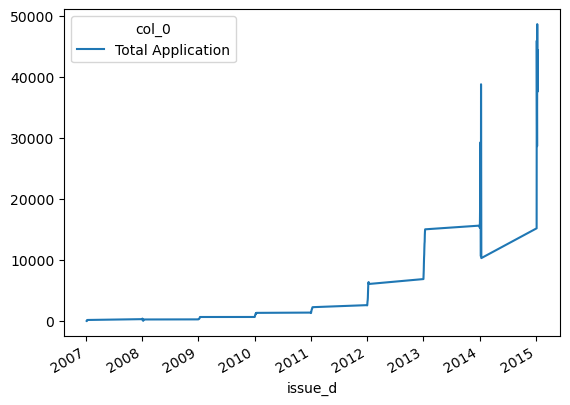

In [29]:
data_plot1.plot()

### Bar plot

We can utilize bar plot for comparison

In [30]:
data_plot2 = pd.crosstab(
    index = loan['region'],
    columns = 'total applicant'
)
data_plot2

col_0         total applicant
region                       
Northern-Irl           167713
cannught               125751
leinster               173702
munster                 85007
ulster                 170250

<AxesSubplot:xlabel='region'>

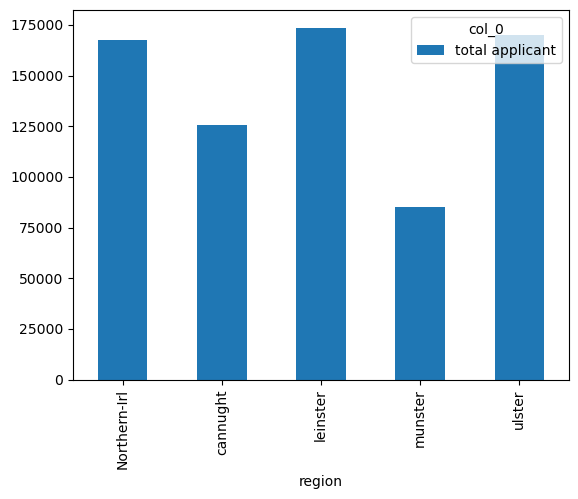

In [31]:
data_plot2.plot(kind='bar')

### Grouped Bar plot

Grouped Bar Plot is used to show multiple comparison

In [32]:
data_plot3 = pd.crosstab(
    index = loan['region'],
    columns = loan['loan_condition']
)
data_plot3

loan_condition  Bad Loan  Good Loan
region                             
Northern-Irl       14243     153470
cannught            9472     116279
leinster           14603     159099
munster             6407      78600
ulster             14442     155808

<AxesSubplot:xlabel='region'>

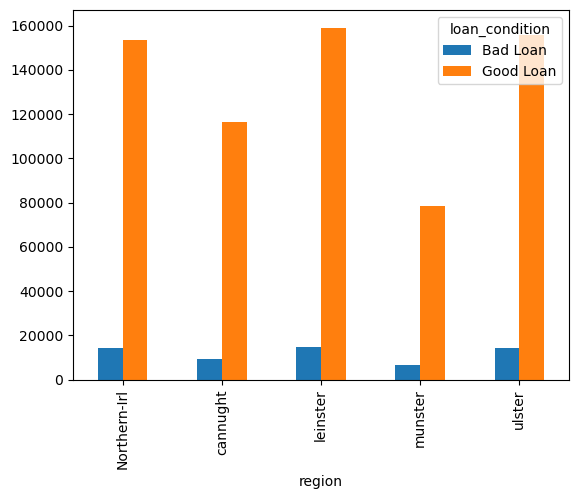

In [33]:
data_plot3.plot(kind='bar')

### Box plot

We can use box plot to show a distribution of data

<AxesSubplot:>

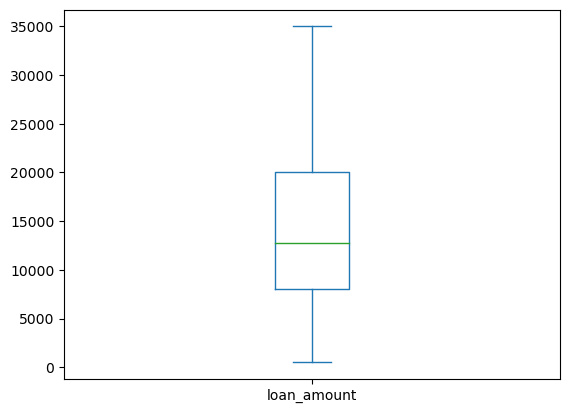

In [34]:
loan['loan_amount'].plot(kind='box')

<AxesSubplot:>

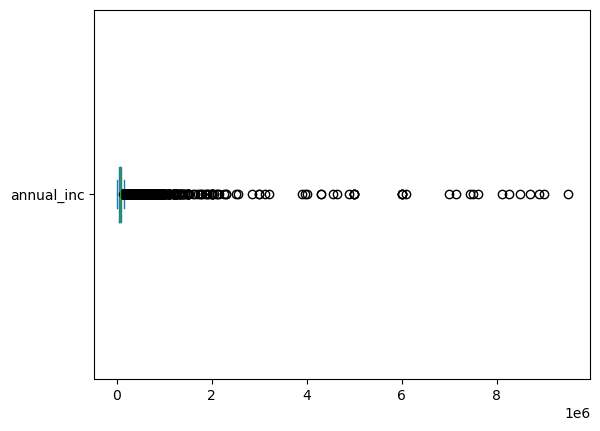

In [35]:
loan['annual_inc'].plot(kind='box', vert=False)

# Missing Values and Duplicates

During the data exploration and preparation phase, it is likely we come across some problematic details in our data. This could be the value of _-1_ for the _age_ column, a value of _blank_ for the _customer segment_ column, or a value of _None_ for the _loan duration_ column. All of these are examples of "untidy" data, which is rather common depending on the data collection and recording process in a company.

In `pandas`, we use `NaN` (not a number) to denote missing data; The equivalent for datetime is `NaT` but both are essentially compatible with each other. From the docs:
> The choice of using `NaN` internally to denote missing data was largely for simplicity and performance reasons. We are hopeful that NumPy will soon be able to provide a native NA type solution (similar to R) performant enough to be used in pandas.

<!--  
code to reproduce the household-missing.csv

household = pd.read_csv("data_input/household.csv", index_col=1, parse_dates=['purchase_time'])
household.drop(['receipt_id', 'yearmonth', 'sub_category'], axis=1, inplace=True)
household['weekday'] = household['purchase_time'].dt.day_name() 
household.head()

import math
x=[i for i in range(32000000, 32000005)]
x.insert(2,32030785)

household2 = household.head(6).copy()
household2 = household2.reindex(x)
household2 = pd.concat([household2, household.head(14)])
household2.loc[31885876, "weekday"] = math.nan
household2.to_csv('data_input/household-missing.csv', index=False)
-->

consider the following data, there are few missing values. We will cover on how to treat the data.

In [36]:
household_missing = pd.read_csv('data_input/household-missing.csv', index_col=0, parse_dates=['purchase_time'])
household_missing.head()

purchase_time category      format  unit_price  \
receipts_item_id                                                        
32000000                         NaT      NaN         NaN         NaN   
32000001                         NaT      NaN         NaN         NaN   
32030785         2018-07-17 18:05:00     Rice  minimarket   63,500.00   
32000002                         NaT      NaN         NaN         NaN   
32000003                         NaT      NaN         NaN         NaN   

                  discount  quantity  weekday  
receipts_item_id                               
32000000               NaN       NaN      NaN  
32000001               NaN       NaN      NaN  
32030785              0.00      1.00  Tuesday  
32000002               NaN       NaN      NaN  
32000003               NaN       NaN      NaN

## Missing Values Treatment

Notice from the output that between row 3 to 8 there are at least a few rows with missing data. We can use `isna()` and `notna()` to detect missing values. An example code is as below:

In [37]:
household_missing['weekday'].isna()

receipts_item_id
32000000     True
32000001     True
32030785    False
32000002     True
32000003     True
32000004     True
32369294    False
31885876     True
31930241    False
32418582    False
32561236    False
32030785    False
32935097    False
32593606    False
32573843    False
31913062    False
31125365    False
32856560    False
32552145    False
32369065    False
Name: weekday, dtype: bool

A common way of using the `.isna()` method is to combine it with the subsetting methods we've learned in previous lessons:

In [38]:
household_missing[household_missing['weekday'].isna()]

purchase_time category      format  unit_price  \
receipts_item_id                                                        
32000000                         NaT      NaN         NaN         NaN   
32000001                         NaT      NaN         NaN         NaN   
32000002                         NaT      NaN         NaN         NaN   
32000003                         NaT      NaN         NaN         NaN   
32000004                         NaT      NaN         NaN         NaN   
31885876         2018-07-15 16:17:00     Rice  minimarket  102,750.00   

                  discount  quantity weekday  
receipts_item_id                              
32000000               NaN       NaN     NaN  
32000001               NaN       NaN     NaN  
32000002               NaN       NaN     NaN  
32000003               NaN       NaN     NaN  
32000004               NaN       NaN     NaN  
31885876              0.00      1.00     NaN

Go ahead and use `notna()` to extract all the rows where `weekday` column is not missing:

In [39]:
## Your code below


## -- Solution code

Another common use-case in missing values treatment is to count the number of `NAs` across each column:

In [40]:
household_missing.isna().sum()

purchase_time    5
category         5
format           5
unit_price       5
discount         5
quantity         5
weekday          6
dtype: int64

When we are certain that the rows with `NA`s can be safely dropped, we can use `dropna()`, optionally specifying a threshold. By default, this method drops the row if any NA value is present (`how='any'`), but it can be set to do this only when all values are NA in that row (`how='all'`).

```
    # drops row if all values are NA
    household2.dropna(how='all')
    
    # drops row if it doesn't have at least 5 non-NA values
    household2.dropna(thresh=5) 
```

In [41]:
household_missing.dropna(thresh = 6) # NA in 6 columns

purchase_time category       format  unit_price  \
receipts_item_id                                                         
32030785         2018-07-17 18:05:00     Rice   minimarket   63,500.00   
32369294         2018-07-22 21:19:00     Rice  supermarket  128,000.00   
31885876         2018-07-15 16:17:00     Rice   minimarket  102,750.00   
31930241         2018-07-15 12:12:00     Rice  supermarket   64,000.00   
32418582         2018-07-24 08:27:00     Rice   minimarket   65,000.00   
32561236         2018-07-26 11:28:00     Rice  supermarket  124,500.00   
32030785         2018-07-17 18:05:00     Rice   minimarket   63,500.00   
32935097         2018-07-29 18:18:00     Rice  supermarket   66,500.00   
32593606         2018-07-25 12:48:00     Rice   minimarket   62,500.00   
32573843         2018-07-26 16:41:00     Rice   minimarket   62,500.00   
31913062         2018-07-14 21:17:00     Rice  supermarket   64,000.00   
31125365         2018-07-02 15:39:00     Rice   minimarket  112,500.00   
32856560         2018-07-31 05:51:00     Rice  hypermarket   77,750.00   
32552145         2018-07-26 11:43:00     Rice   minimarket   66,500.00   
32369065         2018-07-23 14:22:00     Rice   minimarket   62,900.00   

                  discount  quantity    weekday  
receipts_item_id                                 
32030785              0.00      1.00    Tuesday  
32369294              0.00      1.00     Sunday  
31885876              0.00      1.00        NaN  
31930241              0.00      3.00     Sunday  
32418582              0.00      1.00    Tuesday  
32561236              0.00      1.00   Thursday  
32030785              0.00      1.00    Tuesday  
32935097              0.00      1.00     Sunday  
32593606              0.00      1.00  Wednesday  
32573843              0.00      1.00   Thursday  
31913062              0.00      3.00   Saturday  
31125365              0.00      1.00     Monday  
32856560              0.00      1.00    Tuesday  
32552145              0.00      1.00   Thursday  
32369065              0.00      1.00     Monday

Some common methods when working with missing values are demonstrated in the following section. We make a copy of the NA-included DataFrame, and name it `household_clean`:

In [42]:
household_clean = household_missing.copy()
household_clean.head()

purchase_time category      format  unit_price  \
receipts_item_id                                                        
32000000                         NaT      NaN         NaN         NaN   
32000001                         NaT      NaN         NaN         NaN   
32030785         2018-07-17 18:05:00     Rice  minimarket   63,500.00   
32000002                         NaT      NaN         NaN         NaN   
32000003                         NaT      NaN         NaN         NaN   

                  discount  quantity  weekday  
receipts_item_id                               
32000000               NaN       NaN      NaN  
32000001               NaN       NaN      NaN  
32030785              0.00      1.00  Tuesday  
32000002               NaN       NaN      NaN  
32000003               NaN       NaN      NaN

In the following cell, the technique is demonstrably repetitive or even verbose. This is done to give us an idea of all the different options we can pick from. 

You may observe, for example that the two lines of code are functionally identical:
- `.fillna(0)`
- `.replace(np.nan, 0)`

In [43]:
household_clean.dtypes

purchase_time    datetime64[ns]
category                 object
format                   object
unit_price              float64
discount                float64
quantity                float64
weekday                  object
dtype: object

In [44]:
household_clean[['category', 'format','discount']] = household_clean[['category', 'format','discount']].fillna('Missing')
household_clean['unit_price'] = household_clean['unit_price'].fillna(0)
household_clean['purchase_time'] = household_clean['purchase_time'].fillna(method='bfill')
household_clean['weekday'] = household_clean['purchase_time'].dt.day_name()
household_clean['quantity'] = household_clean['quantity'].replace(np.nan, -1)

household_clean.head()

purchase_time category      format  unit_price  \
receipts_item_id                                                        
32000000         2018-07-17 18:05:00  Missing     Missing        0.00   
32000001         2018-07-17 18:05:00  Missing     Missing        0.00   
32030785         2018-07-17 18:05:00     Rice  minimarket   63,500.00   
32000002         2018-07-22 21:19:00  Missing     Missing        0.00   
32000003         2018-07-22 21:19:00  Missing     Missing        0.00   

                 discount  quantity  weekday  
receipts_item_id                              
32000000          Missing     -1.00  Tuesday  
32000001          Missing     -1.00  Tuesday  
32030785             0.00      1.00  Tuesday  
32000002          Missing     -1.00   Sunday  
32000003          Missing     -1.00   Sunday

## Duplicated Data

To observe for duplicates in our data, we can use `duplicate()` and combine it with the subsetting method as below:

In [45]:
household_clean[household_clean.duplicated(keep=False)]

purchase_time category      format  unit_price  \
receipts_item_id                                                        
32000000         2018-07-17 18:05:00  Missing     Missing        0.00   
32000001         2018-07-17 18:05:00  Missing     Missing        0.00   
32030785         2018-07-17 18:05:00     Rice  minimarket   63,500.00   
32000002         2018-07-22 21:19:00  Missing     Missing        0.00   
32000003         2018-07-22 21:19:00  Missing     Missing        0.00   
32000004         2018-07-22 21:19:00  Missing     Missing        0.00   
32030785         2018-07-17 18:05:00     Rice  minimarket   63,500.00   

                 discount  quantity  weekday  
receipts_item_id                              
32000000          Missing     -1.00  Tuesday  
32000001          Missing     -1.00  Tuesday  
32030785             0.00      1.00  Tuesday  
32000002          Missing     -1.00   Sunday  
32000003          Missing     -1.00   Sunday  
32000004          Missing     -1.00   Sunday  
32030785             0.00      1.00  Tuesday

When we have data where duplicated observations are recorded, we can use `.drop_duplicates()` specifying whether the first occurence or the last should be kept. You can specify whether you want to keep the first or last occurence with `keep=` `'first'`/`'last'`.

In [46]:
household_clean.drop_duplicates()

purchase_time category       format  unit_price  \
receipts_item_id                                                         
32000000         2018-07-17 18:05:00  Missing      Missing        0.00   
32030785         2018-07-17 18:05:00     Rice   minimarket   63,500.00   
32000002         2018-07-22 21:19:00  Missing      Missing        0.00   
32369294         2018-07-22 21:19:00     Rice  supermarket  128,000.00   
31885876         2018-07-15 16:17:00     Rice   minimarket  102,750.00   
31930241         2018-07-15 12:12:00     Rice  supermarket   64,000.00   
32418582         2018-07-24 08:27:00     Rice   minimarket   65,000.00   
32561236         2018-07-26 11:28:00     Rice  supermarket  124,500.00   
32935097         2018-07-29 18:18:00     Rice  supermarket   66,500.00   
32593606         2018-07-25 12:48:00     Rice   minimarket   62,500.00   
32573843         2018-07-26 16:41:00     Rice   minimarket   62,500.00   
31913062         2018-07-14 21:17:00     Rice  supermarket   64,000.00   
31125365         2018-07-02 15:39:00     Rice   minimarket  112,500.00   
32856560         2018-07-31 05:51:00     Rice  hypermarket   77,750.00   
32552145         2018-07-26 11:43:00     Rice   minimarket   66,500.00   
32369065         2018-07-23 14:22:00     Rice   minimarket   62,900.00   

                 discount  quantity    weekday  
receipts_item_id                                
32000000          Missing     -1.00    Tuesday  
32030785             0.00      1.00    Tuesday  
32000002          Missing     -1.00     Sunday  
32369294             0.00      1.00     Sunday  
31885876             0.00      1.00     Sunday  
31930241             0.00      3.00     Sunday  
32418582             0.00      1.00    Tuesday  
32561236             0.00      1.00   Thursday  
32935097             0.00      1.00     Sunday  
32593606             0.00      1.00  Wednesday  
32573843             0.00      1.00   Thursday  
31913062             0.00      3.00   Saturday  
31125365             0.00      1.00     Monday  
32856560             0.00      1.00    Tuesday  
32552145             0.00      1.00   Thursday  
32369065             0.00      1.00     Monday

In [47]:
print(household_clean.shape)
print(household_clean.drop_duplicates(keep="first").shape)

(20, 7)
(16, 7)


**Knowledge Check:** Duplicates and Missing Value  

1. Duplicates may mean a different thing from a data point-of-view and a business analyst's point-of-view. You want to be extra careful about whether the duplicates is an intended characteristic of your data, or whether it poses a violation to the business logic. 

    - a. A medical center collects anonymized heart rate monitoring data from patients. It has duplicate observations collected across a span of 3 months
    - b. An insurance company uses machine learning to deliver dynamic pricing to its customers. Each row contains the customer's name, occupation / profession and historical health data. It has duplicate observations collected across a span of 3 months

---

2. Once you've identified the missing values, there are 3 common ways to deal with it:

    - a. Use `dropna` with a reasonable threshold to remove any rows that contain too little values rendering it unhelpful to your analysis
    - b. Replace the missing values with a central value (mean or median)
    - c. Imputation through a predictive model
        - In a dataframe where `salary` is missing but the bank has data about the customer's occupation / profession, years of experience, years of education, seniority level, age, and industry, then a machine learning model such as regression or nearest neighbor can offer a viable alternative to the mean imputation approach